In [ ]:
import numpy as np 
import math
import matplotlib.pyplot as plt
import pandas as pd
import csv
import tensorflow as tf
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
print(tf.test.gpu_device_name()) #check if the GPU is enabled
!cat /proc/meminfo #Checking RAM available for your process

/device:GPU:0
MemTotal:       13302924 kB
MemFree:         9430732 kB
MemAvailable:   12015844 kB
Buffers:          128532 kB
Cached:          2489956 kB
SwapCached:            0 kB
Active:          1360604 kB
Inactive:        2177772 kB
Active(anon):     767552 kB
Inactive(anon):     2492 kB
Active(file):     593052 kB
Inactive(file):  2175280 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              5068 kB
Writeback:             0 kB
AnonPages:        919812 kB
Mapped:           670860 kB
Shmem:              3216 kB
KReclaimable:     116508 kB
Slab:             172472 kB
SReclaimable:     116508 kB
SUnreclaim:        55964 kB
KernelStack:        6000 kB
PageTables:        10616 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6651460 kB
Committed_AS:    4222632 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       47828 kB
VmallocChunk:          0 kB
Per

In [ ]:
data=pd.read_csv('gdrive/My Drive/house_price.csv')
print(data.head())
data.describe()

   Unnamed: 0  X.1  X          id  ...      lat     long  sqft_living15  sqft_lot15
0           1    1  1  7129300520  ...  47.5112 -122.257           1340        5650
1           2    2  2  6414100192  ...  47.7210 -122.319           1690        7639
2           3    3  3  5631500400  ...  47.7379 -122.233           2720        8062
3           4    4  4  2487200875  ...  47.5208 -122.393           1360        5000
4           5    5  5  1954400510  ...  47.6168 -122.045           1800        7503

[5 rows x 24 columns]


,Unnamed: 0,X.1,X,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,21613.00000,21613.00000,2.161300e+04,2.159300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10807.00000,10807.00000,10807.00000,4.580302e+09,5.400676e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,6239.28002,6239.28002,2.876566e+09,3.670742e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.00000,1.00000,1.00000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5404.00000,5404.00000,5404.00000,2.123049e+09,3.220000e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10807.00000,10807.00000,10807.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16210.00000,16210.00000,16210.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21613.00000,21613.00000,21613.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
data = data.dropna() # because the number of nan value is too small compared with total value so just drop
data.describe()

,Unnamed: 0,X.1,X,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21593.000000,21593.000000,21593.000000,2.159300e+04,2.159300e+04,21593.000000,21593.000000,21593.000000,2.159300e+04,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000
mean,10816.537721,10816.537721,10816.537721,4.580609e+09,5.400676e+05,3.370676,2.114667,2079.857963,1.510572e+04,1.494234,0.007549,0.234243,3.409438,7.656833,1788.414671,291.443292,1971.005882,84.295512,98077.938499,47.560057,-122.213905,1986.529014,12768.030751
std,6234.283826,6234.283826,6234.283826,2.876622e+09,3.670742e+05,0.929706,0.770197,918.365987,4.143345e+04,0.540035,0.086557,0.766301,0.650660,1.175250,828.164388,442.470447,29.378560,401.436238,53.503490,0.138574,0.140826,685.286456,27313.000361
min,1.000000,1.000000,1.000000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5419.000000,5419.000000,5419.000000,2.123049e+09,3.220000e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10817.000000,10817.000000,10817.000000,3.904931e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,16215.000000,16215.000000,16215.000000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068700e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21613.000000,21613.000000,21613.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


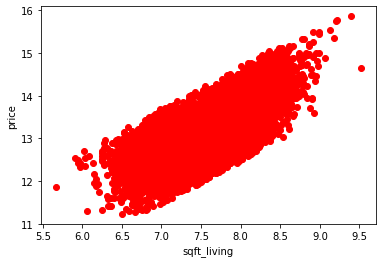

In [ ]:
#data transformation
price = []
sqft_living = []
sqft_living15 = []
sqft_above = []
floors = []
condition =[]
for i in data.price:
  price.append(math.log(i))
for i in data.sqft_living:
  sqft_living.append(math.log(i))
for i in data.sqft_living15:
  sqft_living15.append(math.log(i))
for i in data.sqft_above:
  sqft_above.append(math.log(i))
for i in data.floors:
  floors.append(math.log(i))
for i in data.condition:
  condition.append(math.log(i))

#convert from list type to array type
price = np.array(price)
condition = np.array(condition)
floors = np.array(floors)
sqft_living = np.array(sqft_living)
sqft_living15 = np.array(sqft_living15)
sqft_above = np.array(sqft_above)
#scatter plot
plt.scatter(sqft_living,price,c ='red')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()


<Figure size 432x288 with 0 Axes>

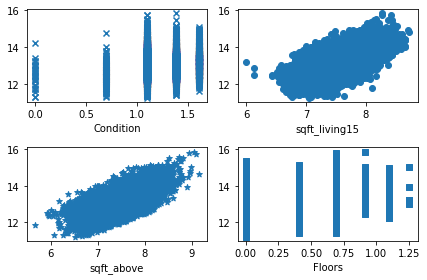

In [ ]:
f = plt.figure()    
f, axes = plt.subplots(nrows = 2, ncols = 2, sharex=False, sharey = False)
norm=plt.Normalize(-27,27)
sc = axes[0][0].scatter(condition,price, marker = "x", norm=norm)
axes[0][0].set_xlabel('Condition')

axes[0][1].scatter(sqft_living15,price, marker = 'o', norm=norm)
axes[0][1].set_xlabel('sqft_living15')

axes[1][0].scatter(sqft_above,price, marker = '*', norm=norm)
axes[1][0].set_xlabel('sqft_above')

axes[1][1].scatter(floors,price, marker = 's', norm=norm )
axes[1][1].set_xlabel('Floors')
plt.tight_layout()
plt.show()

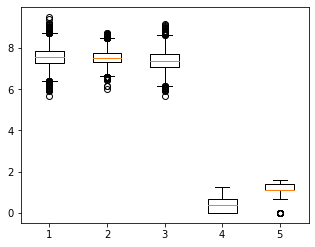

In [ ]:
box = [sqft_living,sqft_living15,sqft_above,floors,condition]
fig = plt.figure(figsize =(4, 3))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(box)
# show plot
plt.show()

In [ ]:
# make X matrix
X =  np.column_stack([sqft_living,sqft_living15,sqft_above,floors,condition])
X =  np.hstack((np.ones((len(price), 1)), X))  # first column of X contains "1" to multiply with bias

# matrix Y  
Y = np.column_stack([price])

# matrix weight W  
W = np.array([0.,0.,0.,0.,0.,0.,]).reshape(-1,1) # - w1..w5 for 5 features and w0 for bias

print(W)
print(X)
print(Y)
er =  np.dot(X,W) - Y
print(np.multiply(er,er))
print(er*er)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[1.         7.07326972 7.20042489 7.07326972 0.         1.09861229]
 [1.         7.85166118 7.43248381 7.68248245 0.69314718 1.09861229]
 [1.         6.64639051 7.90838716 6.64639051 0.         1.09861229]
 ...
 [1.         6.92755791 6.92755791 6.92755791 0.69314718 1.09861229]
 [1.         7.37775891 7.25134498 7.37775891 0.69314718 1.09861229]
 [1.         6.92755791 6.92755791 6.92755791 0.69314718 1.09861229]]
[[12.30998211]
 [13.19561384]
 [12.10071213]
 ...
 [12.90445858]
 [12.89921983]
 [12.69158046]]
[[151.53565952]
 [174.12422459]
 [146.42723405]
 ...
 [166.52505124]
 [166.38987212]
 [161.07621461]]
[[151.53565952]
 [174.12422459]
 [146.42723405]
 ...
 [166.52505124]
 [166.38987212]
 [161.07621461]]


In [ ]:
 print("Solving linear regression using linear algebra: w0,w1,..w5")
 np.dot( np.dot(np.linalg.pinv(np.dot(np.transpose(X),X)),np.transpose(X)) , Y)

Solving linear regression using linear algebra: w0,w1,..w5


array([[ 5.55565545],
       [ 0.68783795],
       [ 0.42749158],
       [-0.18216545],
       [ 0.2026224 ],
       [ 0.29283688]])

In [ ]:
                                            # BUILDING THE LINEAR REGRESSION MODEL   
epochs = 1000  # The number of iterations to perform batch gradient descent
n = len(price) # Number of elements in each feature
learning_rate = 0.01160904
k=0
cost_list = []
cost_list.append(0)
W = np.array([0.,0.,0.,0.,0.,0.,]).reshape(-1,1) # - w1..w5 for 5 features and w0 for bias
# Performing Gradient Descent 
for i in range(epochs): 
    error =  np.dot(X,W) - Y
    cost_list.append( (0.5/n) * np.sum(np.multiply(error,error)) ) 
    # take derivative
    D_w0 =   (1/n) * np.sum(error)                                        # Derivative wrt w0 - bias
    D_w1 =   (1/n) * np.sum(np.multiply(error, X[:,1].reshape(-1,1)))     # Derivative wrt w1 - feature 1: sqft_living
    D_w2 =   (1/n) * np.sum(np.multiply(error, X[:,2].reshape(-1,1)))     # Derivative wrt w2 - feature 2: sqft_living15
    D_w3 =   (1/n) * np.sum(np.multiply(error, X[:,3].reshape(-1,1)))     # Derivative wrt w3 - feature 3: sqft_above
    D_w4 =   (1/n) * np.sum(np.multiply(error, X[:,4].reshape(-1,1)))     # Derivative wrt w4 - feature 4: floors
    D_w5 =   (1/n) * np.sum(np.multiply(error, X[:,5].reshape(-1,1)))     # Derivative wrt w5 - feature 5: condition
    
    # Update weight and intercept
    W[0] -=  (learning_rate * D_w0)   
    W[1] -=  (learning_rate * D_w1) 
    W[2] -=  (learning_rate * D_w2) 
    W[3] -=  (learning_rate * D_w3) 
    W[4] -=  (learning_rate * D_w4) 
    W[5] -=  (learning_rate * D_w5) 
  
    k=i+1
    # Breaking condition -- accepted error so do not need to loop 1000 times 
    if abs(cost_list[k] - cost_list[k-1]) < 1e-5: break

print("Number of iterations: ",k)
print(cost_list[k-1])
print(cost_list[k])
print(W)

Number of iterations:  741
0.09735540957721917
0.09734544413585995
[[ 0.17228628]
 [ 0.5456601 ]
 [ 0.71746086]
 [ 0.41681309]
 [-0.14848901]
 [ 0.26532082]]


# New Section

Min value of Cost function when running 1000 loops:

---


cost_list[k-1]:  
0.0956453483306748

---

cost_list[k]:   
0.09564036642760902

---
Weight maxtrix w0,w1..w5:    
[[ 0.20126769]
 [ 0.53775314]
 [ 0.74638578]
 [ 0.38319558]
 [-0.16283897]
 [ 0.30539369]]

In [ ]:
print("Predicted value: ", W[0] + W[1]*sqft_living.mean() + W[2]*sqft_living15.mean() + W[3]*sqft_above.mean() + W[4]*2 + W[5]*3)

Predicted value:  [13.28272589]


Predicted value when running 1000 loops: 13.31300619  

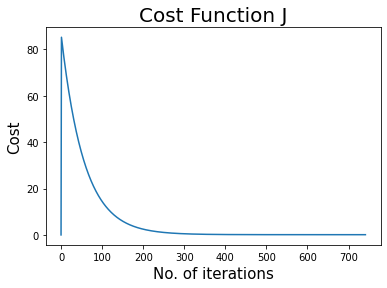

In [ ]:
plt.title('Cost Function J', size = 20)
plt.xlabel('No. of iterations', size=15)
plt.ylabel('Cost', size=15)
plt.plot(cost_list)
plt.show()

In [ ]:
        #Linear regression with sklearn -- no log transformation
from sklearn import linear_model
x_reg = data[[ 'sqft_living','sqft_living15','sqft_above','floors','condition']]
y_reg = data['price']
regr = linear_model.LinearRegression()
regr.fit(x_reg, y_reg)
print('coeficient: ',regr.coef_)
print('intercept: ',regr.intercept_)
print('')
print('predict:',round(sum(regr.predict([[data.sqft_living.mean(),data.sqft_living15.mean(),data.sqft_above.mean(),2,3]]))))



coeficient:  [ 2.63263721e+02  8.09165268e+01 -4.33015299e+01  3.79601891e+04
  4.98966260e+04]
intercept:  -317626.35481815063

predict: 538837


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
